#### https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming -->> Needs to explore for dynamic visuals

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Before building some cool & fancy time series models, Lets perform some Analysis to understand Data

### 3) Is there a global warming?
    Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [84]:
global_temp = pd.read_csv("F:\Spatial Analysis\Global_Warming/GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
global_temp['dt'][0].split('-')[0]

'1750'

In [86]:
def fetch_year(date):
    return date.split('-')[0]

In [87]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [88]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [89]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [90]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['Uncertainty bottom']=data['LandAverageTemperature']- data['LandAverageTemperatureUncertainty']

In [91]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [ ]:
import plotly.express as px
fig=px.line(data,x="years",y=["Uncertainty top","Uncertainty bottom","LandAverageTemperature"],title="Average Land Temperature in World",template="plotly_dark")
fig.show()

    From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

### Analyse Average temperature in each season

In [93]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [94]:
global_temp.shape

(3192, 10)

In [95]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [96]:
global_temp['month'] = global_temp['dt'].dt.month

In [97]:
global_temp.drop('dt',axis=1,inplace=True)


In [98]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [99]:
global_temp.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
month                                          int64
dtype: object

In [100]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [101]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [102]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [103]:
years=global_temp['years'].unique()

In [104]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    current_yr=global_temp[global_temp['years']==year]
    spring_temps.append(current_yr[current_yr['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season'] == 'winter']['LandAverageTemperature'].mean())
    

In [105]:
### lets make a dataframe of it
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [106]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [107]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [ ]:
import plotly.express as px
fig=px.line(season,x="year",y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()

    Is it getting warmer? Yes, it is.

In [ ]:
### Lets Build a Time Series Model

In [3]:
cities = pd.read_csv('F:\Spatial Analysis\Global_Warming/GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
cities.shape

(8599212, 7)

In [5]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [6]:
usa=cities[cities['Country']=='United States']

In [7]:
usa.shape

(687289, 7)

In [8]:
usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [9]:
data=['New York','Los Angeles','San Francisco']

In [10]:
data2=usa[usa['City'].isin(data)]

In [11]:
data2.shape

(7193, 7)

In [12]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [13]:
data2=data2[['dt','AverageTemperature']]

In [14]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [15]:
data2.columns = ['Date','Temp']

In [16]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [17]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [18]:
data2['Date']=pd.to_datetime(data2['Date'])

In [19]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [20]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [21]:
data2.dropna(inplace=True)

In [22]:
data2.shape

(7073, 2)


    note: for Machine Learning,feature is a columns & we have by-default index as from 0 but for our time series Problem,we have date column our as row-index

In [23]:
data2.set_index('Date',inplace=True)

In [24]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [25]:
data2.tail()

,Temp
Date,
2013-05-01,17.434
2013-06-01,19.759
2013-07-01,20.657
2013-08-01,19.731
2013-09-01,20.471


In [26]:
#note when implementing ARIMA.
#Arima should selected only when your data is not seasonal.
#if we use ARIMA in seasonal data,we dont get better forecast. 

    SARIMA Model (p, d, q)(P, D, Q, S):
    SARIMA stands for Seasonal Auto Regressive Integrated Moving Average, The name scares, but this is not as scary as 
    it seems.

    Non seasonal ARIMA:
    We can split the Arima term into three terms, AR, I, MA:

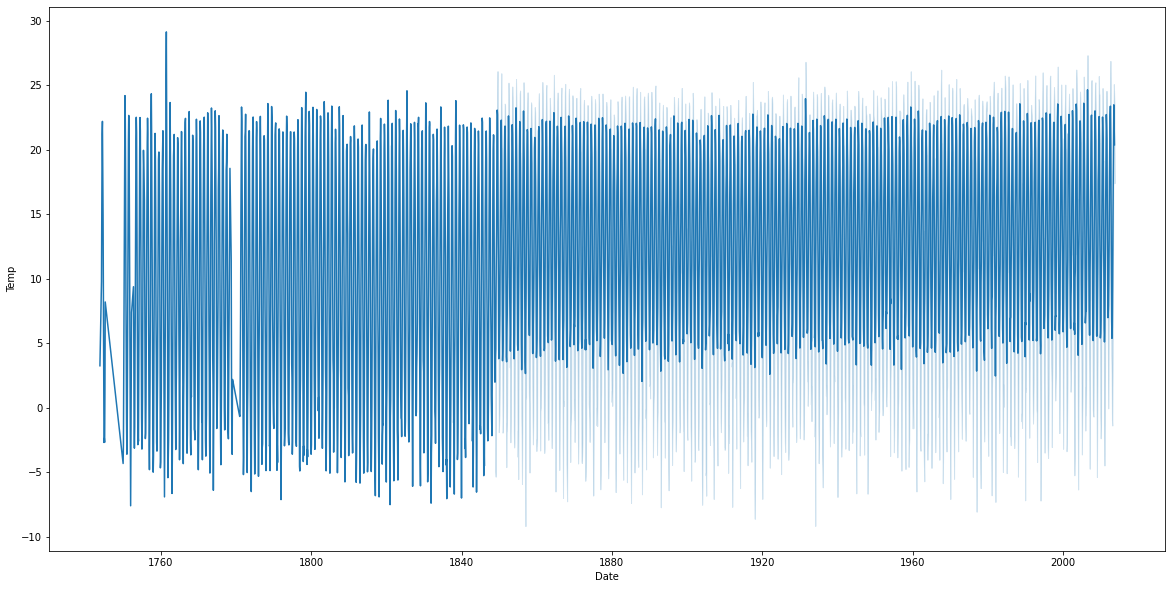

In [27]:
## takes almost 3 mins
plt.figure(figsize=(20,10))
import seaborn as sns
sns.lineplot(x=data2.index, y=data2['Temp'])

In [28]:
### may be a stationey data not sure after visualising this plot, so we have to use some techniques,
##so what exactly is a stationery data, so data that has no trend no that has constant mean & std dev throughout data
## & we will observe in the 1780s, we have little bit spike over here

In [29]:
#if not stationery then we have to make it stationery

In [30]:
### Testing For Stationarity,Augmented Dickey-Fuller unit test

from statsmodels.tsa.stattools import adfuller

In [31]:
test_result=adfuller(data2['Temp'])
#apply adfuller on data2['Temp']

In [32]:
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most imp is p-value
#this is almost similar to Hypothesis testing,whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery

#lags are those which are our previous Data

In [33]:
#if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

In [34]:
#Ho: ie null hypoIt is non stationary
#H1: ie Alternate Hypo ,It is stationary
#zip basically combines result,labels

In [35]:
def adfuller_test(Temp):
    result=adfuller(Temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [36]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -2.006389303675715
p-value : 0.283778658333361
#Lags Used : 35
Number of Observations Used : 7037
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
df=data2.copy()

In [38]:
df['first_diff_temp']=df['Temp']-data2['Temp'].shift(12)

In [39]:
df.head()

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [40]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['first_diff_temp'].dropna())

ADF Test Statistic : -21.239650404910833
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 7025
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
data2['Temp'].shift(12)

Date
1849-01-01       NaN
1849-02-01       NaN
1849-03-01       NaN
1849-04-01       NaN
1849-05-01       NaN
               ...  
2013-05-01    16.555
2013-06-01    18.482
2013-07-01    19.632
2013-08-01    20.531
2013-09-01    19.045
Name: Temp, Length: 7073, dtype: float64

In [42]:
#now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationery graph

In [43]:
#once data becones stationery,we have to stop there

In [44]:
df.head()

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


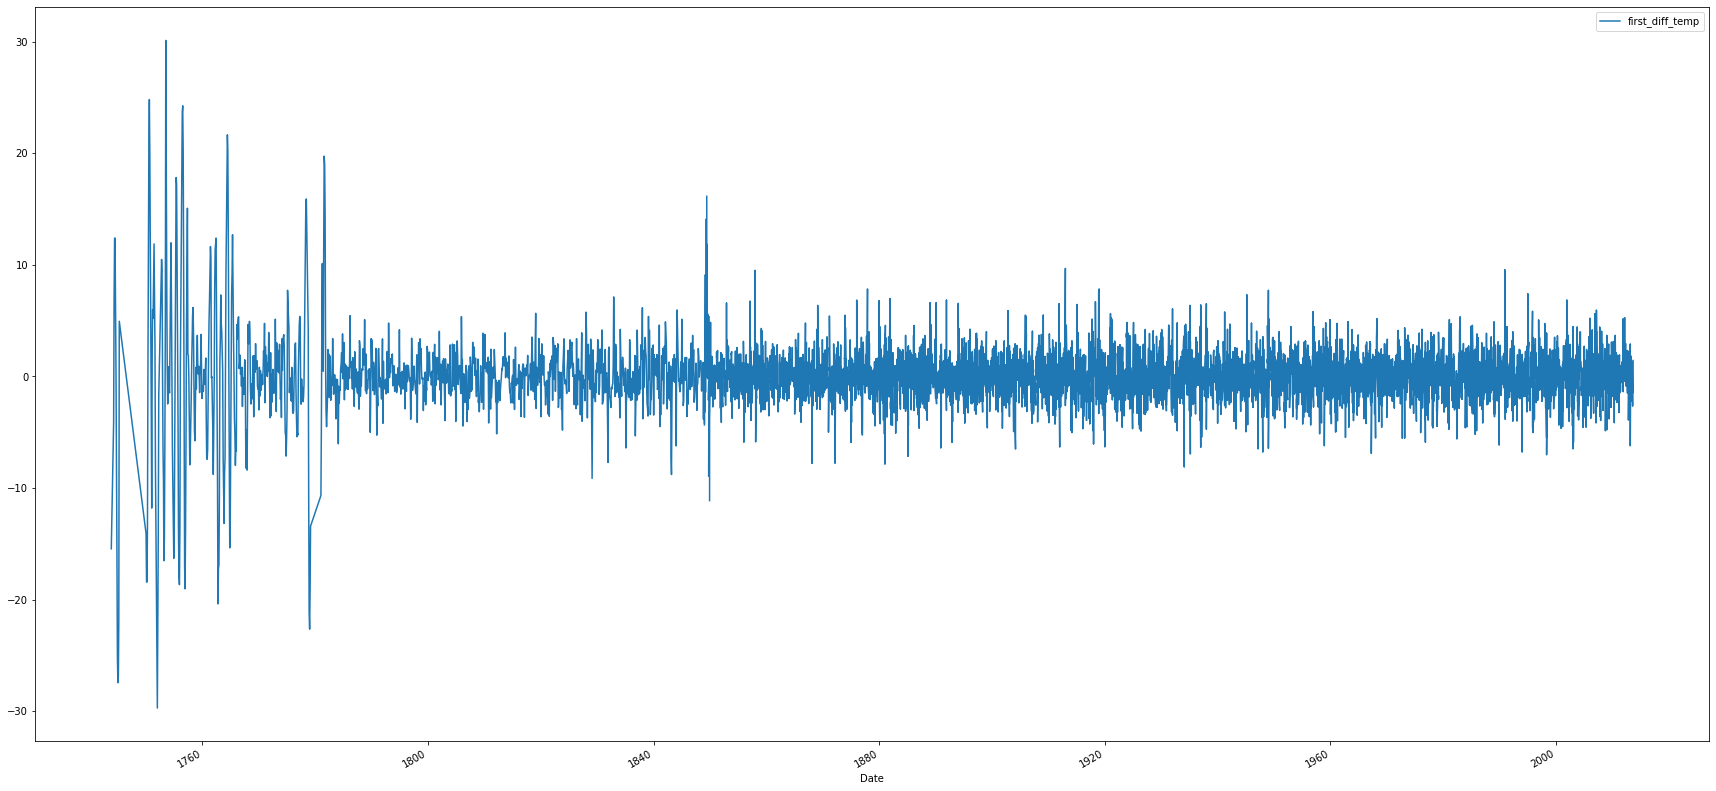

In [45]:
df[['first_diff_temp']].plot(figsize=(30,15))

In [ ]:
#note when implementing ARIMA,
#Arima should selected only when your data is not seasonal
#if we use ARIMA in seasonal data,we dont get better forecast

### Examine whether there is a seasonality factor in your data or not
        a)Visualisation approach
    
    (seasonality is all about suppose in each yr in christmas sales goes up) and then down
        

In [25]:
###  i'm going to create a pivot table to plot the monthly temperatures through the years
data2['month'] = data2.index.month
data2['year'] = data2.index.year


In [26]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [27]:
pivot = data2.pivot_table(values='Temp',index='month',columns='year')

In [28]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperatures')

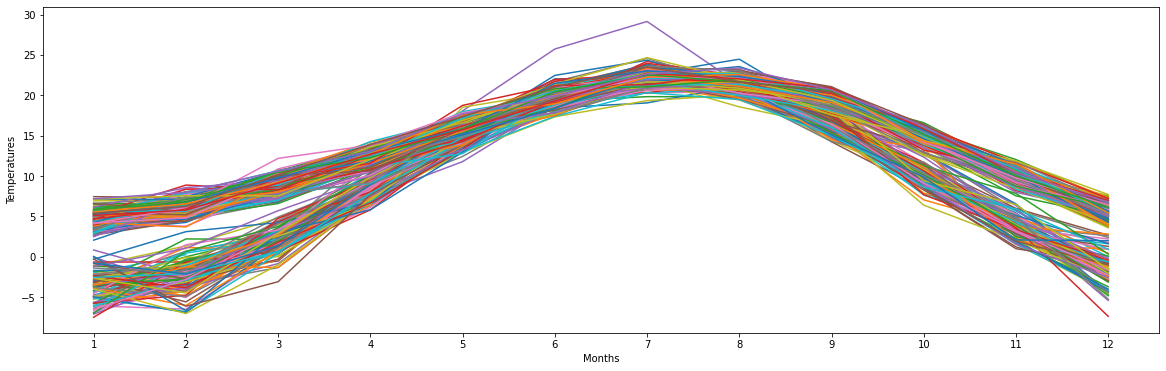

In [29]:
##if we want to plot with respect to time or index , we can use pivot.plot()
pivot.plot(figsize=(20,6))
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

#looking this graph,we can say this data is seasonal
The series clearly has some seasonality, the higher temperatures are around b/w June & August and the lower are between December & Feb
so thats basically a observation that u can drawn and represent to ur client¶

    Just to make the things clear, I'll merge these lines into just one line, averaging the monthly levels:

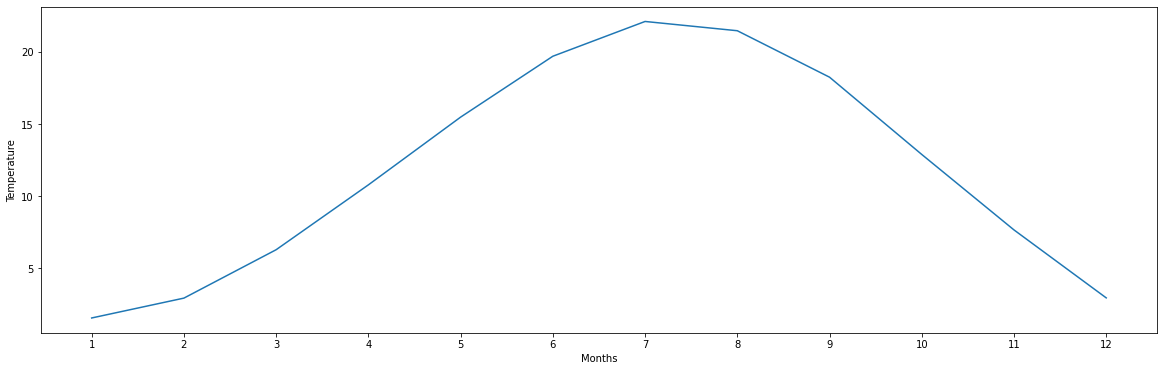

In [30]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In [86]:
df.head()

,Temp,month,year,first_diff_temp
Date,,,,
1849-01-01,8.819,1,1849,NaN
1849-02-01,9.577,2,1849,NaN
1849-03-01,11.814,3,1849,NaN
1849-04-01,13.704,4,1849,NaN
1849-05-01,14.834,5,1849,NaN


In [88]:
df=df[['first_diff_temp']]

In [89]:
df.head()

,first_diff_temp
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN


In [90]:
df.dropna(inplace=True)

    types of models in Time-Series :
     1.Base line model
     2.Exponential model
     3.AR model
     4.MA model
     5.ARIMA model
     6.SARIMA model(Seasonal ARIMA)

    smoothing time-series
    smoothing is basically done by Moving Avearge
    MA highly used in Stock Market Analysis as well as in Some business as well

In [46]:
### ### Smoothening your series using moving average
    ## Rolling is just like a window that you are going to consider
    ## or I can say its a window that we have considered for Moving average,
## lets say 5 is the window size or 5 is the business period
df['first_diff_temp'].rolling(window=5).mean()
##### lets day u r expertise in any area & u know within 7 days, the maximum value is the true reflector of our business as we are in high growth era
##### & minimum value is a true reflector of our baseline, so in such case instead of mean , u can call min & max function

### this technique has already used lots of time in Stock Market & stock Analyst used basically Moving average to remove such noise in data

Date
1849-01-01       NaN
1849-02-01       NaN
1849-03-01       NaN
1849-04-01       NaN
1849-05-01       NaN
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_diff_temp, Length: 7073, dtype: float64

In [51]:
value=pd.DataFrame(df['first_diff_temp'])

In [52]:
temp_df=pd.concat([value,df['first_diff_temp'].rolling(window=5).mean()],axis=1)

In [53]:
temp_df

,first_diff_temp,first_diff_temp
Date,,
1849-01-01,NaN,NaN
1849-02-01,NaN,NaN
1849-03-01,NaN,NaN
1849-04-01,NaN,NaN
1849-05-01,NaN,NaN
...,...,...
2013-05-01,0.879,0.4336
2013-06-01,1.277,1.0236
2013-07-01,1.025,1.4060


In [54]:
temp_df.columns=['actual_Temp','forecast_Temp']

In [57]:
temp_df.head(20)

,actual_Temp,forecast_Temp
Date,,
1849-01-01,NaN,NaN
1849-02-01,NaN,NaN
1849-03-01,NaN,NaN
1849-04-01,NaN,NaN
1849-05-01,NaN,NaN
1849-06-01,NaN,NaN
1849-07-01,NaN,NaN
1849-08-01,NaN,NaN
1849-09-01,NaN,NaN


In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
### then check accuracy
np.sqrt(mean_squared_error(temp_df['forecast_Temp'][16:],temp_df['actual_Temp'][16:]))

2.3934235122562058

In [ ]:
#### why [16:] bcz we have a missing value at first 16 index,thats why [16:]

    why np.sqrt, bcz mean_squared_error gives square of error , and then by calling np.sqrt we get actual error
    if we have outlier in data, This error will increase, dats why we have to deal with outlier
    Using Base-line, we can say using this basic technique we are getting error of 4 degree celsius every day, it means error of +-4 is going to happen in your prediction.

In [68]:
#### for this use-case we will come to ARIMA 

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [62]:
df.head()

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


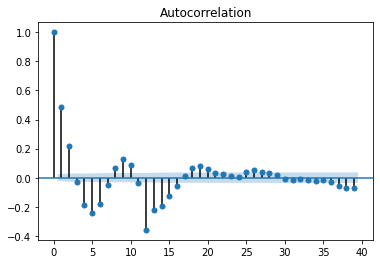

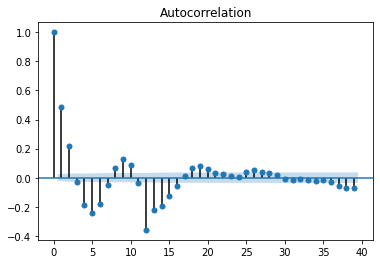

In [64]:
plot_acf(df['first_diff_temp'].dropna())
##q--3

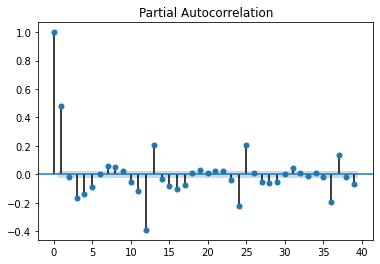

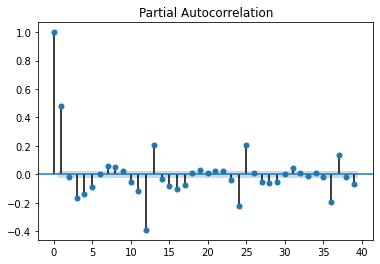

In [65]:
plot_pacf(df['first_diff_temp'].dropna())
##p--2

In [66]:
df=df[['first_diff_temp']]

In [69]:
df.dropna(inplace=True)

In [70]:
df.shape

(7061, 1)

In [71]:
training_data=df[0:6000]
test_data=df[6000:]

### create test that is basically unseen to our model, or which is basocally is used for evalaution

In [73]:
from statsmodels.tsa.arima_model import ARIMA

In [74]:
### arima= ARIMA(training_data,order=(p,d,q))

arima= ARIMA(training_data,order=(2,1,3))

In [75]:
### then doing model.fit ie fitting our model to data
model=arima.fit()

In [76]:
model.aic

27459.259177222975

In [77]:
len(test_data)

1061

In [80]:
pred= model.forecast(steps=len(test_data))[0]
pred

array([-0.19791054, -0.3855745 , -0.35273213, ...,  0.03873478,
        0.03874505,  0.03875531])

In [81]:
len(pred)

1061

In [82]:
np.sqrt(mean_squared_error(test_data,pred))

1.5120453542239605

In [ ]:
### now u will see it is better than Naive model that we have created as Error has decreased that shows Arima model
### is much more good in such sceario rather than Baseline 

### model Tuning or Hyperparameter Tuning or choosing the best pair of (p,d,q

In [83]:
#### now define hyper-para=meters 
p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,4)


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair, 
## approx takes somewhere 20 mins & more
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:6000]
            test=df[6000:]
            predictions=[]
            ### now we have train & test data that we can pass to our algorithm
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    ##displacement=0
                    model=arima.fit(disp=0)
                    pred_y=model.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error, order))
                except:
                    continue


MSE is 2.283672928281577 with order (0, 0, 0)
MSE is 2.5227585624956 with order (0, 0, 1)
MSE is 2.2953713111799883 with order (0, 0, 2)
MSE is 2.385539455012164 with order (0, 0, 3)
